### IMPORT LIBRARIES

In [1]:
import pandas as pd 
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

### DATA LOADING

In [2]:
data = pd.read_csv('data.csv', sep='|')
data.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


### DATA PREPROCESSING

In [3]:

data.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

### FEATURE SELECTION

In [4]:
data['legitimate'].value_counts()

0    96724
1    41323
Name: legitimate, dtype: int64

In [5]:
x = data.drop(['Name','md5','legitimate'], axis=1).values
y = data['legitimate'].values

In [6]:
print("x:",x.shape)
print("y:",y.shape)

x: (138047, 54)
y: (138047,)


### DATA SPLITTING

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
print("x_train: ",X_train.shape)
print("y_train: ",y_train.shape)
print("x_test: ",X_test.shape)
print("y_test: ",y_test.shape)

x_train:  (103535, 54)
y_train:  (103535,)
x_test:  (34512, 54)
y_test:  (34512,)


### MODEL BUILDING

In [8]:
import sklearn.ensemble as ske 
from sklearn import tree, linear_model
from sklearn.feature_selection import SelectFromModel
from sklearn.naive_bayes import GaussianNB

In [9]:
#Algorithm comparison
algorithms = {
        "DecisionTree": tree.DecisionTreeClassifier(max_depth=10),
        "RandomForest": ske.RandomForestClassifier(n_estimators=50),
        "GradientBoosting": ske.GradientBoostingClassifier(n_estimators=50),
        "AdaBoost": ske.AdaBoostClassifier(n_estimators=100),
    }

### TESTING

In [10]:
results = {}
print("\nNow testing algorithms")
for algo in algorithms:
    clf = algorithms[algo]
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    print("%s : %f %%" % (algo, score*100))
    results[algo] = score

winner = max(results, key=results.get)
print('\nWinner algorithm is %s with a %f %% success' % (winner, results[winner]*100))


Now testing algorithms
DecisionTree : 99.095967 %
RandomForest : 99.472647 %
GradientBoosting : 98.942397 %
AdaBoost : 98.887344 %

Winner algorithm is RandomForest with a 99.472647 % success


### PERFORMANC EVALUATION

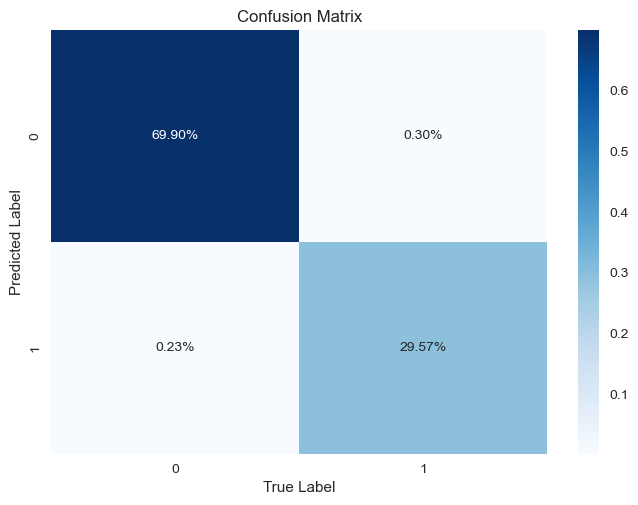

In [11]:
from sklearn.metrics import confusion_matrix

clf = algorithms[winner]
res = clf.predict(X_test)
mt = confusion_matrix(y_test, res)
sns.heatmap(mt/np.sum(mt), annot=True,fmt='.2%', cmap=plt.cm.Blues)
plt.ylabel('Predicted Label')
plt.xlabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('Confusion Matrix',dpi=300)

### Model Save

In [12]:
import pickle
import joblib
joblib.dump(algorithms[winner], 'classifier.pkl')#Persist an arbitrary Python object into one file.
print('Saved')

Saved
